In [15]:
from sympy import *
import numpy as np
from matplotlib import pyplot as plt
# from jupyterthemes import jtplot
# jtplot.style()

In [2]:
var(('h', 'dt', 'U', 'B_x', 'B_y', 'E_x', 'E_y', 'omega', 'x', 'c'))

A = Matrix([ [0, 0, 0, 1], 
             [0, 0, -1, 0],
             [0, -1, 0, 0],
             [1, 0, 0, 0],
           ])
U = Matrix([
            [B_x], 
            [B_y], 
            [E_x], 
            [E_y]
            ])

def rhs(u):
    return A * u * I * sin(omega*h) / h

In [3]:
# apply RK4 routine
K1 = rhs(U)
K2 = rhs(U + dt/2 * K1)
K3 = rhs(U + dt/2 * K2)
K4 = rhs(U + dt * K3)
U1 = U + dt/6 * (K1 + 2 * K2 + 2 * K3 + K4)

# show U1, simplified
U1.simplify()
U1

Matrix([
[ B_x*dt**4*sin(h*omega)**4/(24*h**4) - B_x*dt**2*sin(h*omega)**2/(2*h**2) + B_x - I*E_y*dt**3*sin(h*omega)**3/(6*h**3) + I*E_y*dt*sin(h*omega)/h],
[ B_y*dt**4*sin(h*omega)**4/(24*h**4) - B_y*dt**2*sin(h*omega)**2/(2*h**2) + B_y + I*E_x*dt**3*sin(h*omega)**3/(6*h**3) - I*E_x*dt*sin(h*omega)/h],
[ I*B_y*dt**3*sin(h*omega)**3/(6*h**3) - I*B_y*dt*sin(h*omega)/h + E_x*dt**4*sin(h*omega)**4/(24*h**4) - E_x*dt**2*sin(h*omega)**2/(2*h**2) + E_x],
[-I*B_x*dt**3*sin(h*omega)**3/(6*h**3) + I*B_x*dt*sin(h*omega)/h + E_y*dt**4*sin(h*omega)**4/(24*h**4) - E_y*dt**2*sin(h*omega)**2/(2*h**2) + E_y]])

In [4]:
# get the coefficients
coef_U0 = diff(U1,U[0])
coef_U1 = diff(U1,U[1])
coef_U2 = diff(U1,U[2])
coef_U3 = diff(U1,U[3])

# form the matrix
m = Matrix( [ [coef_U0, coef_U1, coef_U2, coef_U3] ] )
m = simplify(m.subs({dt : c * h, omega * h : x}))
m

Matrix([
[c**4*sin(x)**4/24 - c**2*sin(x)**2/2 + 1,                                        0,                                        0,       I*c*(-c**2*sin(x)**2 + 6)*sin(x)/6],
[                                       0, c**4*sin(x)**4/24 - c**2*sin(x)**2/2 + 1,        I*c*(c**2*sin(x)**2 - 6)*sin(x)/6,                                        0],
[                                       0,        I*c*(c**2*sin(x)**2 - 6)*sin(x)/6, c**4*sin(x)**4/24 - c**2*sin(x)**2/2 + 1,                                        0],
[      I*c*(-c**2*sin(x)**2 + 6)*sin(x)/6,                                        0,                                        0, c**4*sin(x)**4/24 - c**2*sin(x)**2/2 + 1]])

In [5]:
# get the eigenvalues
evals=[]
for key in m.eigenvals().keys():
    print(key)
    key.simplify() 
    evals.append(key)
print(evals)

c**4*sin(x)**4/24 - c**2*sin(x)**2/2 - I*c*(c**2*sin(x)**2 - 6)*sin(x)/6 + 1
c**4*sin(x)**4/24 - c**2*sin(x)**2/2 + I*c*(c**2*sin(x)**2 - 6)*sin(x)/6 + 1
[c**4*sin(x)**4/24 - c**2*sin(x)**2/2 - I*c*(c**2*sin(x)**2 - 6)*sin(x)/6 + 1, c**4*sin(x)**4/24 - c**2*sin(x)**2/2 + I*c*(c**2*sin(x)**2 - 6)*sin(x)/6 + 1]


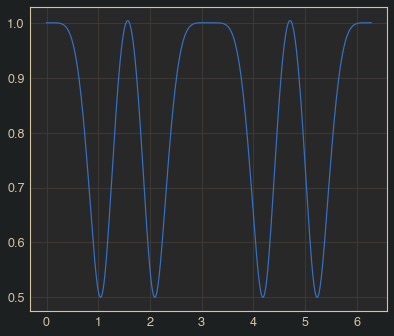

In [33]:
# evaluate the eigenvalues for a given courant factor c
f = evals[0].subs({c : 2.827}).simplify()
g = lambdify(x, f)

# output plot
z_grid = np.linspace(0, 2*np.pi, 500, dtype=np.complex128)
y_grid = np.abs(g(z_grid))
x_grid = z_grid.real
plt.plot(x_grid, y_grid)
plt.show()

# plt.savefig('Figures/vonNeumann_just_stable.pdf')
# plt.savefig('Figures/vonNeumann_stable.pdf')
# plt.savefig('Figures/vonNeumann_not_stable.pdf')